## Verfeinerung von Etikettenbildern
Ähnlich wie bei morphologischen Operationen auf binären Bildern ist es auch möglich, Etikettenbilder zu verfeinern. Dieses Notebook zeigt, wie das geht.

Siehe auch
* [scikit-image's Tutorial zur Erweiterung von Segmentierungsetiketten ohne Überlappung](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_expand_labels.html)

In [1]:
import pyclesperanto_prototype as cle
import numpy as np
from skimage.io import imread

cl.OCLArray([[ 0,  0,  0, ..., 13, 13, 13],
       [ 0,  0,  0, ..., 13, 13, 13],
       [ 0,  0,  0, ..., 13, 13, 13],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
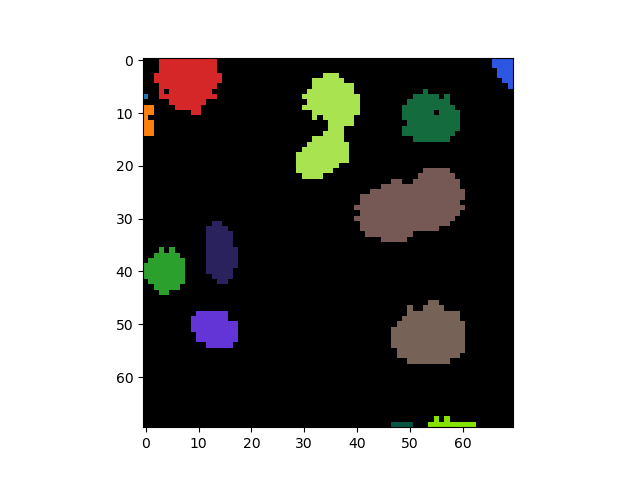

In [2]:
label_image = cle.gauss_otsu_labeling(imread("../../data/mitosis_mod.tif"), outline_sigma=0)
label_image

## Erodieren von Etiketten
Beim Erodieren von Etiketten müssen wir vorsichtig sein, da sich Objekte in zwei teilen könnten. Dies könnte beabsichtigt sein, z.B. um sich berührende Zellkerne wie im obigen Beispiel zu unterscheiden.

cl.OCLArray([[0, 0, 0, ..., 0, 9, 9],
       [0, 0, 0, ..., 0, 9, 9],
       [0, 0, 0, ..., 0, 0, 9],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
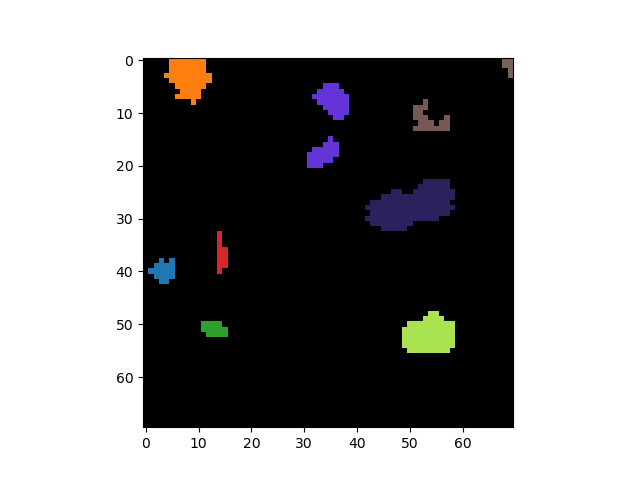

In [3]:
eroded_label_image = cle.erode_labels(label_image,
                                      radius=2,
                                      relabel_islands=False)
eroded_label_image

cl.OCLArray([[ 0,  0,  0, ...,  0, 10, 10],
       [ 0,  0,  0, ...,  0, 10, 10],
       [ 0,  0,  0, ...,  0,  0, 10],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
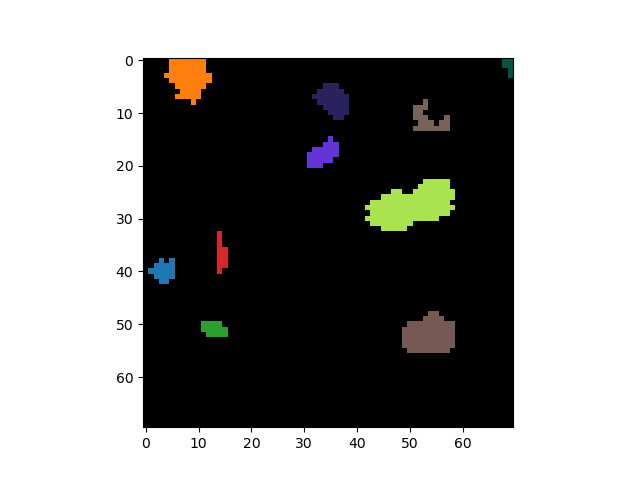

In [4]:
eroded_label_image2 = cle.erode_labels(label_image,
                                      radius=2,
                                      relabel_islands=True)
eroded_label_image2

## Dilatieren von Etiketten
Wir können die Etiketten dann wieder dilatieren, um annähernd zu ihrer ursprünglichen Größe zurückzukehren. Dies könnte auch nützlich sein, wenn segmentierte Objekte im Allgemeinen zu klein sind.

cl.OCLArray([[ 0,  0,  0, ..., 10, 10, 10],
       [ 0,  0,  0, ..., 10, 10, 10],
       [ 0,  0,  2, ..., 10, 10, 10],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
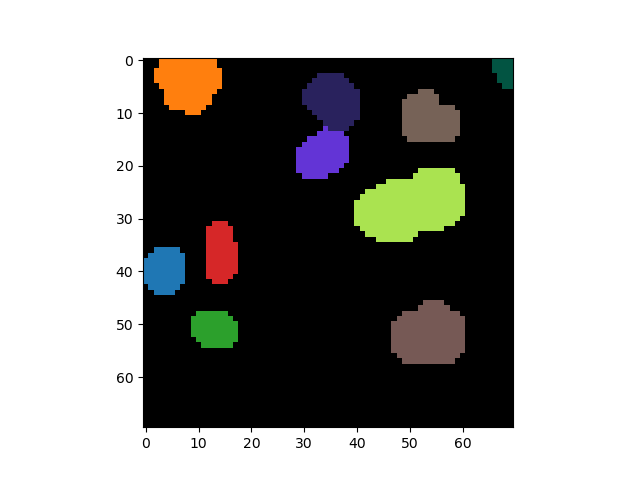

In [5]:
dilated_label_image = cle.dilate_labels(eroded_label_image2, 
                                        radius=2)
dilated_label_image

## Öffnen und Schließen von Etiketten
Das Öffnen und Schließen von Etikettenbildern ist ähnlich wie bei binären Bildern. Der einzige Unterschied besteht darin, dass sich Etiketten nicht weiter ausdehnen können, wenn sie sich berühren.

Beachten Sie, dass beim Öffnen von Etiketten kleine Etiketten verschwinden können.

cl.OCLArray([[0, 0, 0, ..., 9, 9, 9],
       [0, 0, 0, ..., 9, 9, 9],
       [0, 0, 2, ..., 9, 9, 9],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
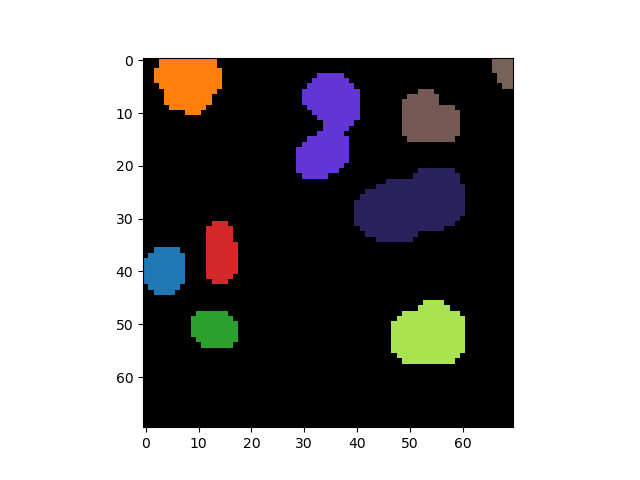

In [6]:
opened_label_image = cle.opening_labels(label_image,
                                        radius=2)
opened_label_image

cl.OCLArray([[ 0,  0,  0, ..., 13, 13, 13],
       [ 0,  0,  0, ..., 13, 13, 13],
       [ 0,  0,  0, ..., 13, 13, 13],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
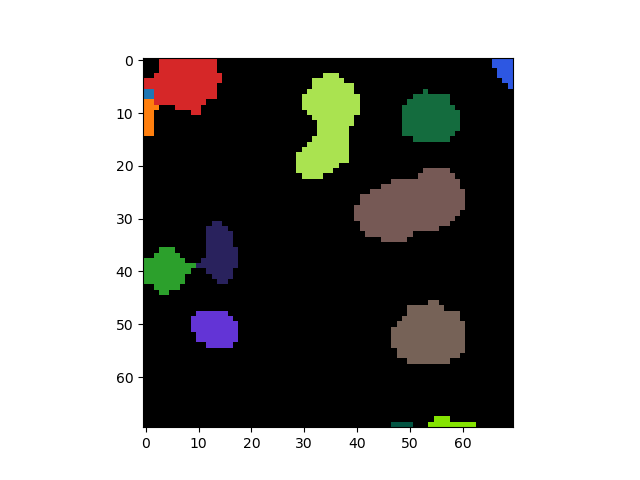

In [7]:
closed_label_image = cle.closing_labels(label_image,
                                        radius=2)
closed_label_image

## Übung
Verwenden Sie die oben eingeführten Operationen, um kleine Objekte in diesem Etikettenbild verschwinden zu lassen.

cl.OCLArray([[0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
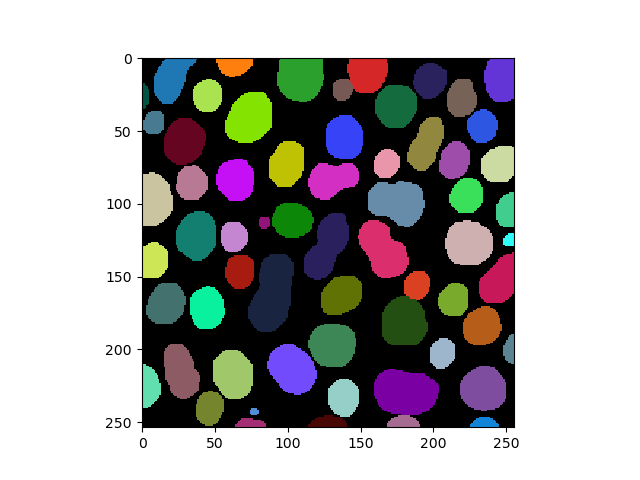

In [8]:
label_blobs = cle.asarray(imread("../../data/blobs_labeled.tif")).astype(np.uint32)
label_blobs